In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('APPLE_iPhone_SE.csv')
df


,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [3]:
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [11]:
df.tail()

,Ratings,Comment,Reviews
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE
9712,5,Terrific purchase,NiceElegant ElectricREAD MORE


In [12]:
df.shape

(9713, 3)

In [13]:
df.columns

Index(['Ratings', 'Comment', 'Reviews'], dtype='object')

In [14]:
df.duplicated().sum()

649

In [15]:
df.isnull().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df['Ratings'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [20]:
df['Ratings'].value_counts()

5    6788
4    1717
3     535
1     474
2     199
Name: Ratings, dtype: int64

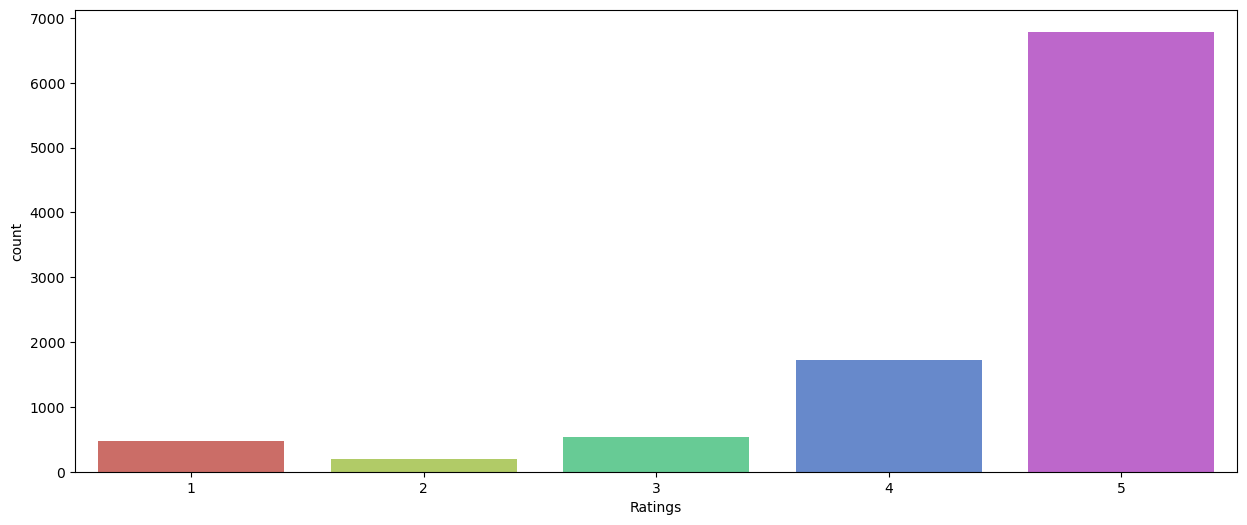

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['Ratings'], data = df, palette = 'hls')
plt.show()

In [22]:
balance_counts = df.groupby('Ratings')['Ratings'].agg('count').values
balance_counts

array([ 474,  199,  535, 1717, 6788], dtype=int64)

In [23]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
 x = [0],
 y=[balance_counts[0]],
 name='Ratings',
 text=[balance_counts[0]],
 textposition='auto',
 marker_color= 'blue'
))
fig.add_trace(go.Bar(x= [1],
 y=[balance_counts[1]],
 name='Reviews',
 text=[balance_counts[1]],
 textposition='auto',
 marker_color= 'red'
))
fig.show()

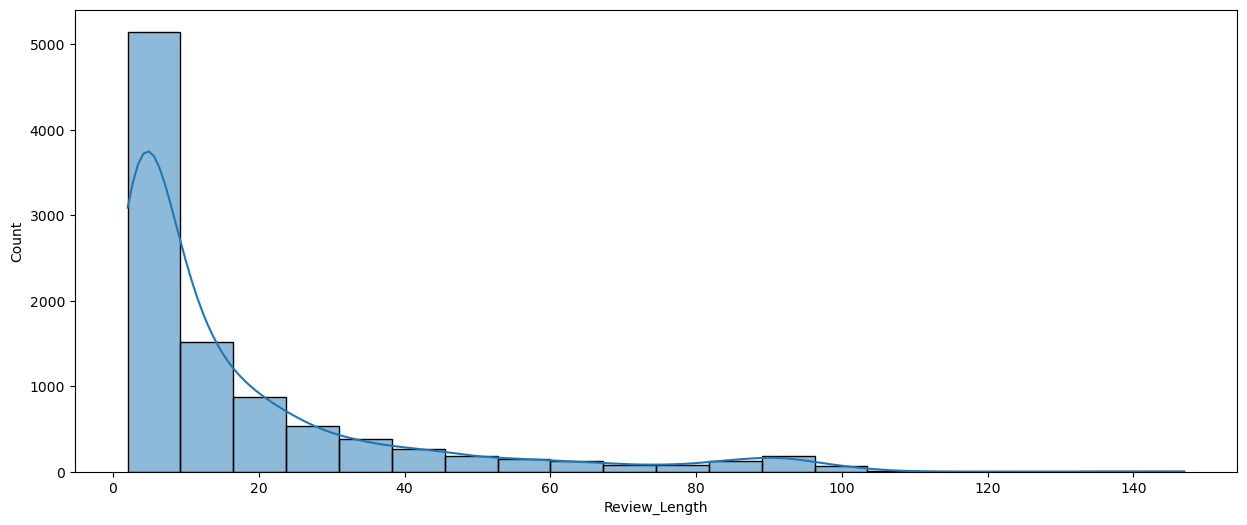

In [26]:
df['Review_Length'] = df['Reviews'].apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15,6))
sns.histplot(df['Review_Length'], bins = 20, kde = True, palette = 'hls')
plt.show()

In [27]:
review_df = df[df['Reviews'] == 0]['Review_Length'].value_counts().sort_index()
rating_df = df[df['Ratings'] == 1]['Review_Length'].value_counts().sort_index()
fig = go.Figure()
fig.add_trace(go.Scatter(
 x=review_df.index,
 y=review_df.values,
 name= 0,
 fill='tozeroy',
 marker_color= 'blue',
))
fig.add_trace(go.Scatter(
 x=rating_df.index,
 y=rating_df.values,
 name=1,
 fill='tozeroy',
 marker_color= 'red',
))
fig.show()

In [28]:
df

,Ratings,Comment,Reviews,Review_Length
0,5,Super!,Great camera for pics and videos Battery life ...,102
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,45
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",29
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,89
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,86
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,3
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",18
9710,5,Awesome,very niceREAD MORE,3
9711,5,Super!,Loving it as of now. Good Product .READ MORE,9


In [29]:
df.Review_Length.describe()


count    9713.000000
mean       17.542469
std        21.680915
min         2.000000
25%         4.000000
50%         9.000000
75%        21.000000
max       147.000000
Name: Review_Length, dtype: float64

In [30]:
df_new = df.copy()


In [31]:
def clean_text(text):
 text = text.lower()
 return text.strip()

In [32]:
df_new.message = df_new.Reviews.apply(lambda x: clean_text(x))

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def remove_punctuation(text):
 punctuationfree="".join([i for i in text if i not in string.punctuation])
 return punctuationfree
df_new['Reviews']= df_new['Reviews'].apply(lambda x:remove_punctuation(x))

In [35]:
import re
def tokenization(text):
 tokens = re.split('W+',text)
 return tokens
df_new['Reviews']= df_new['Reviews'].apply(lambda x: tokenization(x))

In [36]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [37]:
def remove_stopwords(text):
 output= " ".join(i for i in text if i not in stopwords)
 return output


In [38]:
df_new['Reviews']= df_new['Reviews'].apply(lambda x:remove_stopwords(x))

In [39]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [40]:
def stemming(text):
 stem_text = "".join([porter_stemmer.stem(word) for word in text])
 return stem_text
df_new['Reviews']=df_new['Reviews'].apply(lambda x: stemming(x))

In [41]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [42]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatizer(text):
 lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
 return lemm_text
df_new ['Reviews']=df_new['Reviews'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
def clean_text(text):
 text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
 text = re.sub('\S*\d\S*\s*','', text).strip() # Remove words containing numbers
 return text.strip()

In [44]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: clean_text(x))

In [45]:
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [46]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
 doc = nlp(text)
 sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
 return ' '.join(sent)

In [47]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: lemmatizer(x))

KeyboardInterrupt: 

In [48]:
def remove_urls(vTEXT):
 vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
 return(vTEXT)


In [49]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_urls(x))

In [50]:
def remove_digits(text):
 clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
 return(text)

In [51]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_digits(x))

In [52]:
def remove_digits1(sample_text):
 clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) # Side effect: remo
 return(clean_text)

In [53]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_digits1(x))


In [54]:
def remove_emojis(data):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
u"\U0001F300-\U0001F5FF" # symbols & pictographs
u"\U0001F680-\U0001F6FF" # transport & map symbols
u"\U0001F1E0-\U0001F1FF" # flags (iOS)
"]+", flags=re.UNICODE)
 return re.sub(emoji_pattern, '', data)


In [55]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_emojis(x))

In [56]:
df_new


,Ratings,Comment,Reviews,Review_Length
0,5,Super!,great camera for pics and videos battery life ...,102
1,5,Must buy!,great device let me tell the superb build qual...,45
2,5,Great product,ho all loves older size ie inch type should de...,29
3,5,Simply awesome,this iphone se is the best phone ever you get ...,89
4,5,Classy product,this is my second iphone after iphone i’ve bee...,86
...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread more,3
9709,5,Classy product,superb phone this is my iphone i feel se the t...,18
9710,5,Awesome,very niceread more,3
9711,5,Super!,loving it as of now good product read more,9


In [57]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [58]:

import matplotlib.pyplot as plt  
import numpy as np
from PIL import Image 


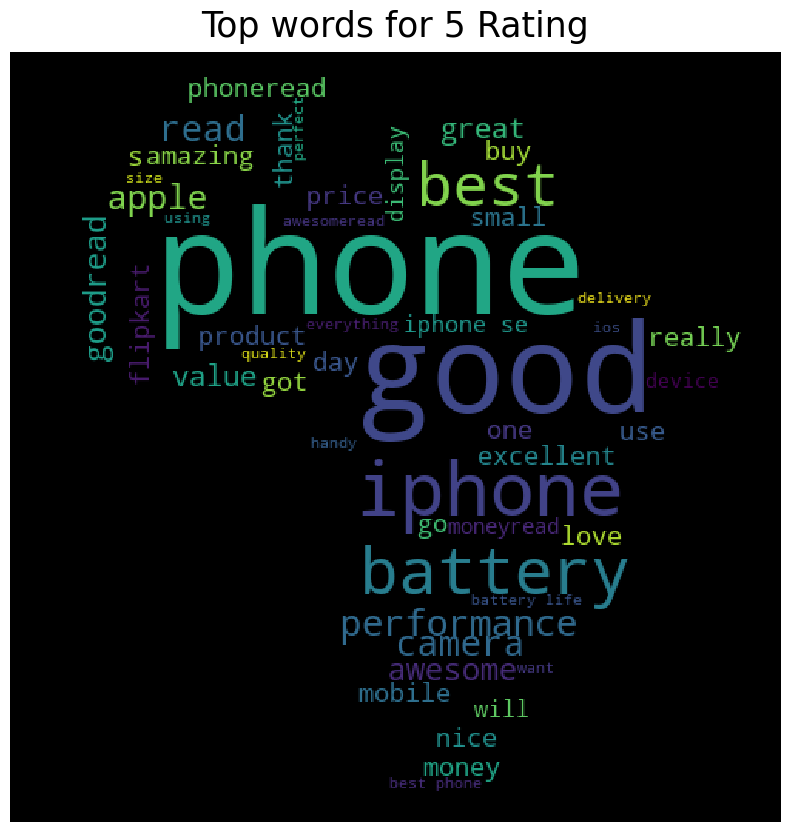

In [59]:
mask = np.array(Image.open(r"C:\Users\KIIT\Downloads\WhatsApp Image 2023-04-03 at 18.29.37.jpeg"))
wc = WordCloud(stopwords=STOPWORDS,random_state=42,
 background_color='Black',width=mask.shape[1],height=mask.shape[0],
 max_words=50,
 mask= mask,
)
tok=" ".join(text for text in df_new.loc[df['Ratings'] == 5, 'Reviews'])
wc.generate(tok)
plt.figure(figsize=(18,10))
plt.title('Top words for 5 Rating',
 fontdict={'size': 25, 'verticalalignment': 'bottom'})
plt.imshow(wc,interpolation="None")
plt.axis("off")
plt.show()

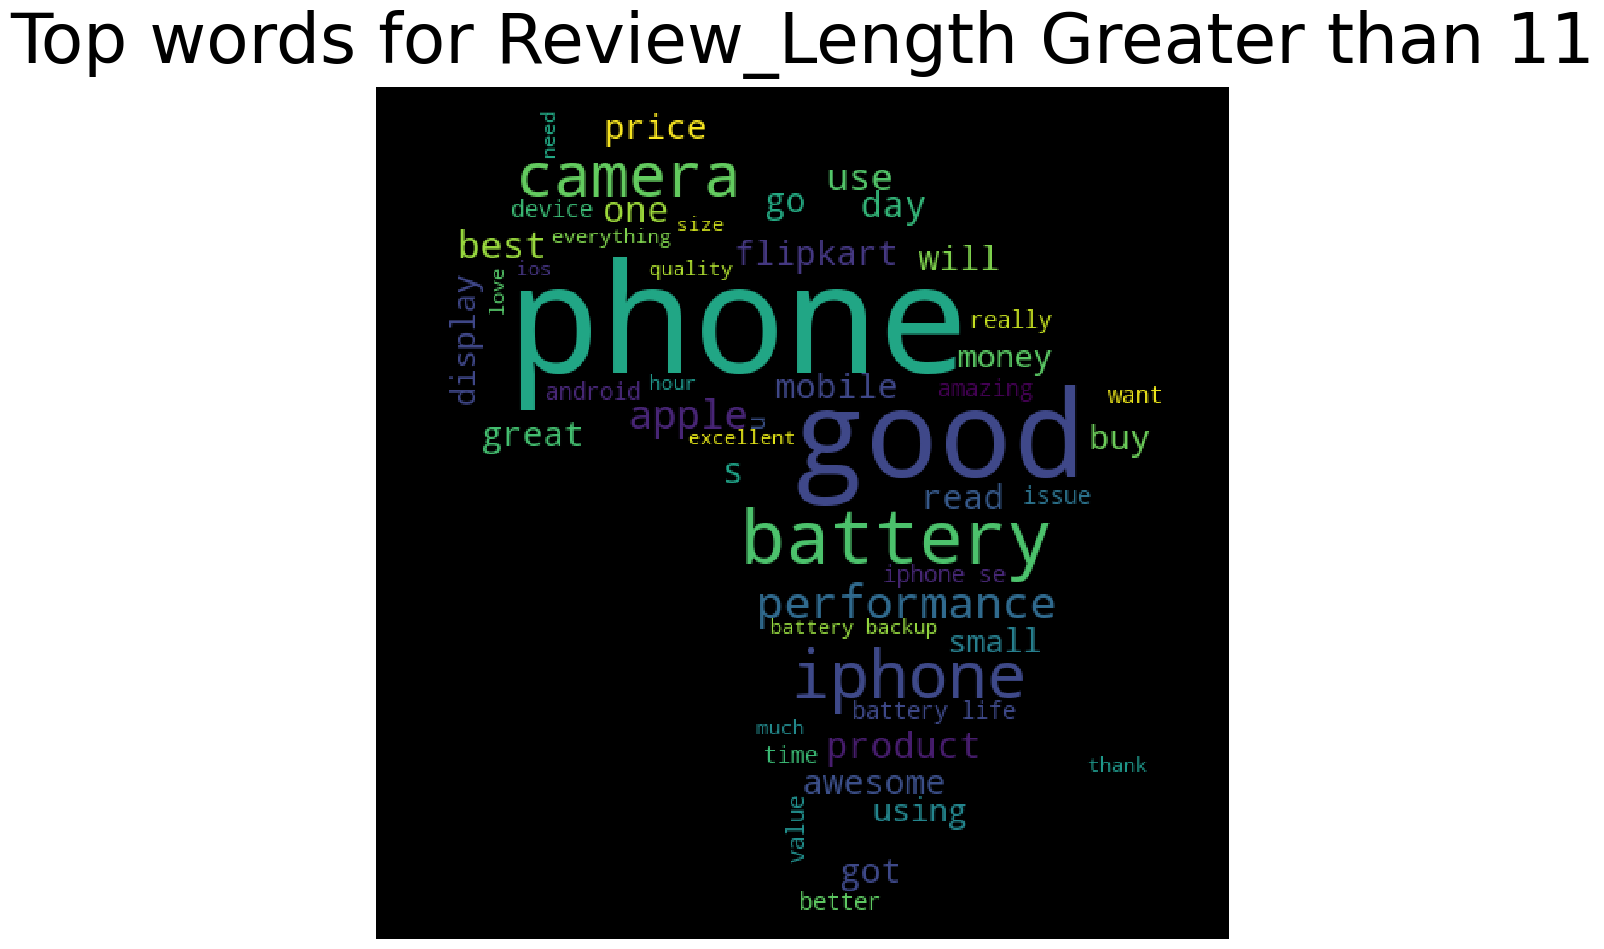

In [61]:
mask = np.array(Image.open(r"C:\Users\KIIT\Downloads\WhatsApp Image 2023-04-03 at 18.29.37.jpeg"))
wc = WordCloud(stopwords=STOPWORDS,random_state=42,
 background_color='Black',width=mask.shape[1],height=mask.shape[0],
 max_words=50,
 mask= mask,
)
tok=" ".join(text for text in df_new.loc[df['Review_Length'] >11 , 'Reviews'])
wc.generate(tok)
plt.figure(figsize=(11,25))
plt.title('Top words for Review_Length Greater than 11',
 fontdict={'size': 50, 'verticalalignment': 'bottom'})
plt.imshow(wc,interpolation="None")
plt.axis("off")
plt.show()

In [62]:
x = df['Reviews'] 
y = df['Ratings']
print(len(x), len(y))

9713 9713


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7284 7284
2429 2429


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
pipe = Pipeline([('bow', CountVectorizer()), ('tfid', TfidfTransformer()), ('model', MultinomialNB())])

In [67]:
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
print(accuracy_score(y_test, y_pred_class))

0.7019349526554137


In [70]:
print(confusion_matrix(y_test, y_pred_class))

[[   0    0    0    0  109]
 [   0    0    0    0   44]
 [   0    0    0    0  131]
 [   0    0    0    0  440]
 [   0    0    0    0 1705]]


In [71]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00       440
           5       0.70      1.00      0.82      1705

    accuracy                           0.70      2429
   macro avg       0.14      0.20      0.16      2429
weighted avg       0.49      0.70      0.58      2429



In [72]:
# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
sentiments = SentimentIntensityAnalyzer()
df_new["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_new["Reviews"]]
df_new["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_new["Reviews"]]
df_new["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_new["Reviews"]]
df_new =df_new[["Reviews", "Positive", "Negative", "Neutral"]]
df_new.head()

,Reviews,Positive,Negative,Neutral
0,great camera for pics and videos battery life ...,0.108,0.000,0.892
1,great device let me tell the superb build qual...,0.521,0.000,0.479
2,ho all loves older size ie inch type should de...,0.303,0.069,0.628
3,this iphone se is the best phone ever you get ...,0.318,0.000,0.682
4,this is my second iphone after iphone i’ve bee...,0.159,0.046,0.795


In [74]:
x = sum(df_new["Positive"])
y = sum(df_new["Negative"])
z = sum(df_new["Neutral"])
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [75]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


Positive:  2447.167000000029
Negative:  271.25899999999984
Neutral:  6994.585000000058


In [76]:
df_new

,Reviews,Positive,Negative,Neutral
0,great camera for pics and videos battery life ...,0.108,0.000,0.892
1,great device let me tell the superb build qual...,0.521,0.000,0.479
2,ho all loves older size ie inch type should de...,0.303,0.069,0.628
3,this iphone se is the best phone ever you get ...,0.318,0.000,0.682
4,this is my second iphone after iphone i’ve bee...,0.159,0.046,0.795
...,...,...,...,...
9708,absolutely brilliantread more,0.000,0.000,1.000
9709,superb phone this is my iphone i feel se the t...,0.360,0.000,0.640
9710,very niceread more,0.000,0.000,1.000
9711,loving it as of now good product read more,0.493,0.000,0.507


In [77]:
df

,Ratings,Comment,Reviews,Review_Length
0,5,Super!,Great camera for pics and videos Battery life ...,102
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,45
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",29
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,89
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,86
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,3
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",18
9710,5,Awesome,very niceREAD MORE,3
9711,5,Super!,Loving it as of now. Good Product .READ MORE,9


In [81]:
ratings = df['Ratings'].value_counts()
numbers = ratings.index
quantity = ratings.values

In [80]:
figure = px.pie(df_new, values=quantity, names=numbers,hole = 0.5)
figure.show()